In [1]:
!pip install tensorflow matplotlib numpy


In [2]:
!pip install wandb


In [3]:
!pip install scikit-learn


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import datetime


### **Dataset Rationale**
*   **Dataset Size:** 10,000 samples were generated to ensure the model sees each of the 2,500 possible pixel locations (50x50) multiple times, allowing it to generalize well.
*   **Normalization:** Input pixel values are scaled to the range [0, 1] by dividing by 255.0. This helps the CNN converge faster during training.
*   **Data Split:** An 80/20 train-test split is used to rigorously evaluate the model on data it hasn't seen during training.

Dataset Generation

In [5]:
IMG_SIZE = 50
DATASET_SIZE = 10000

def generate_sample():
    img = np.zeros((IMG_SIZE, IMG_SIZE), dtype=np.uint8)
    x = np.random.randint(0, IMG_SIZE)
    y = np.random.randint(0, IMG_SIZE)
    img[y, x] = 255
    return img, np.array([x, y])

images = []
labels = []

for _ in range(DATASET_SIZE):
    img, coord = generate_sample()
    images.append(img)
    labels.append(coord)

images = np.array(images).reshape(-1, IMG_SIZE, IMG_SIZE, 1) / 255.0
labels = np.array(labels)

X_train, X_test, y_train, y_test = train_test_split(
    images, labels, test_size=0.2, random_state=42
)

print("Dataset Ready:", X_train.shape, y_train.shape)


Dataset Ready: (8000, 50, 50, 1) (8000, 2)


Build CNN Model

In [6]:
cnn_model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(50,50,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])

cnn_model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss='mse',
    metrics=['mae']
)

cnn_model.summary()


d:\Codes\ml\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 22, 22, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 363,330 (1.39 MB)

 Trainable params: 363,330 (1.39 MB)

 Non-trainable params: 0 (0.00 B)

Train the Model

In [7]:
history = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.1
)


Epoch 1/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - loss: 198.8130 - mae: 10.8624 - val_loss: 93.3718 - val_mae: 6.5664
Epoch 2/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 72.6133 - mae: 5.7826 - val_loss: 42.4206 - val_mae: 3.7305
Epoch 3/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 47.2302 - mae: 4.2470 - val_loss: 38.7777 - val_mae: 3.2048
Epoch 4/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 45.4241 - mae: 4.0558 - val_loss: 40.4067 - val_mae: 3.4118
Epoch 5/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 43.8170 - mae: 3.9136 - val_loss: 40.1016 - val_mae: 3.5079
Epoch 6/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 43.0763 - mae: 3.8192 - val_loss: 40.4509 - val_mae: 3.4364
Epoch 7/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 42.5673 - mae: 3.7142 - val_loss: 40.0295 - val_mae: 3.5919
Epoch 8/20
225/225 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 41.8633 - mae: 3.6441 - val_loss: 48.1838 - val_mae: 4.8936
Epoch 9/20
225/225 ━━━━━━━━━━━

Plot Loss & MAE Curves

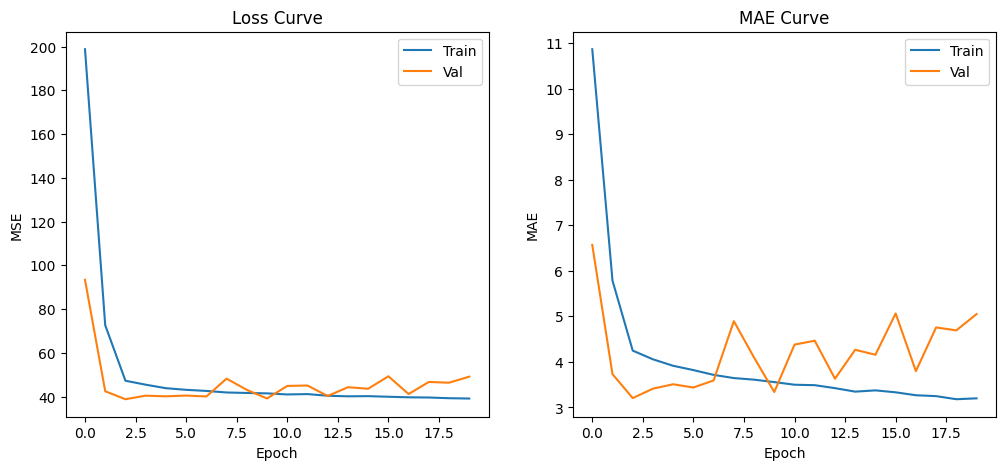

In [8]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend(["Train", "Val"])

plt.subplot(1,2,2)
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title("MAE Curve")
plt.xlabel("Epoch")
plt.ylabel("MAE")
plt.legend(["Train", "Val"])

plt.show()


Test With Random Image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
True Coordinate : [19 28]
Predicted       : [14.726047 23.222372]


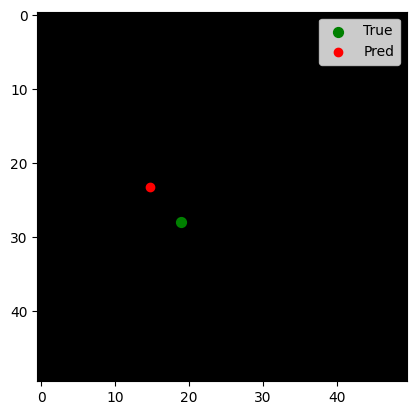

In [9]:
idx = np.random.randint(0, len(X_test))
sample = X_test[idx]
true_coord = y_test[idx]
pred_coord = cnn_model.predict(sample.reshape(1,50,50,1))[0]

print("True Coordinate :", true_coord)
print("Predicted       :", pred_coord)

plt.imshow(sample.reshape(50,50), cmap='gray')
plt.scatter(true_coord[0], true_coord[1], color='green', label="True", s=50)
plt.scatter(pred_coord[0], pred_coord[1], color='red', label="Pred")
plt.legend()
plt.show()


Evaluate Final Model Performance

In [10]:
test_loss, test_mae = cnn_model.evaluate(X_test, y_test)
print("Test MSE:", test_loss)
print("Test MAE:", test_mae)


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 49.2387 - mae: 5.0670
Test MSE: 49.23870849609375
Test MAE: 5.0670247077941895


Save Model

In [ ]:
cnn_model.save("cnn_pixel_regression_model.h5")
print("Model Saved!")


: 